# PM2.5 Sensor Data Analysis

In [1]:
import pandas as pd
# from pandas_profiling import ProfileReport # Provides optional analysis tools

names = 'pm10_standard, pm25_standard, pm100_standard, pm10_env, pm25_env, pm100_env, particles_03um, particles_05um, particles_10um, particles_25um, particles_50um, particles_100um, skip, checksum'
names = names.split(', ')

low = pd.read_csv('filter-low.csv',names=names)
high = pd.read_csv('filter-high.csv', names=names)

# The columns with a _standard suffix are thought to be related to a factor callibration process
drop_columns = ['skip', 'checksum', 'pm10_standard', 'pm25_standard', 'pm100_standard']
low = low.drop(drop_columns, axis=1)
high = high.drop(drop_columns, axis=1)

names = names[3:-2]

In [2]:
low.describe()
high.describe()

,pm10_env,pm25_env,pm100_env,particles_03um,particles_05um,particles_10um,particles_25um,particles_50um,particles_100um
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,24.924708,40.869883,49.400585,5120.396930,1498.389620,331.020102,22.711623,4.739035,0.645468
std,2.250045,3.360904,4.848225,658.500039,194.434488,48.496239,7.142362,2.815709,0.915059
min,20.000000,32.000000,36.000000,3690.000000,1093.000000,225.000000,6.000000,0.000000,0.000000
25%,23.000000,38.000000,46.000000,4617.000000,1348.000000,293.000000,18.000000,3.000000,0.000000
50%,25.000000,41.000000,49.000000,5013.000000,1467.000000,332.000000,22.000000,4.000000,0.000000
75%,27.000000,44.000000,54.000000,5763.000000,1683.000000,372.000000,27.000000,7.000000,1.000000
max,30.000000,47.000000,61.000000,6369.000000,1890.000000,455.000000,58.000000,15.000000,5.000000


,pm10_env,pm25_env,pm100_env,particles_03um,particles_05um,particles_10um,particles_25um,particles_50um,particles_100um
count,4649.000000,4649.000000,4649.000000,4649.000000,4649.000000,4649.000000,4649.000000,4649.000000,4649.000000
mean,11.352979,19.064745,20.751559,2133.007744,621.445687,132.084319,9.192299,2.024521,0.323295
std,4.407047,7.211364,8.887396,829.224421,241.605158,55.419968,6.091671,1.980282,0.575812
min,5.000000,8.000000,9.000000,1083.000000,306.000000,48.000000,0.000000,0.000000,0.000000
25%,8.000000,14.000000,15.000000,1620.000000,472.000000,97.000000,5.000000,1.000000,0.000000
50%,10.000000,17.000000,18.000000,1821.000000,532.000000,113.000000,8.000000,1.000000,0.000000
75%,13.000000,22.000000,23.000000,2430.000000,701.000000,145.000000,12.000000,3.000000,1.000000
max,24.000000,41.000000,50.000000,5079.000000,1488.000000,356.000000,38.000000,12.000000,3.000000


In [3]:
data = dict()

for n in names:
    exec('''{0} = pd.DataFrame({{'low': low['{0}'], 'high': high['{0}']}})'''.format(n))
    data[n] = pd.DataFrame({'low': low[n], 'high': high[n]})

In [4]:
for n in names:
    print(n)
    data[n].describe()
#     n.plot.hist(alpha=0.5)

pm10_env


,low,high
count,2736.000000,4649.000000
mean,24.924708,11.352979
std,2.250045,4.407047
min,20.000000,5.000000
25%,23.000000,8.000000
50%,25.000000,10.000000
75%,27.000000,13.000000
max,30.000000,24.000000


pm25_env


,low,high
count,2736.000000,4649.000000
mean,40.869883,19.064745
std,3.360904,7.211364
min,32.000000,8.000000
25%,38.000000,14.000000
50%,41.000000,17.000000
75%,44.000000,22.000000
max,47.000000,41.000000


pm100_env


,low,high
count,2736.000000,4649.000000
mean,49.400585,20.751559
std,4.848225,8.887396
min,36.000000,9.000000
25%,46.000000,15.000000
50%,49.000000,18.000000
75%,54.000000,23.000000
max,61.000000,50.000000


particles_03um


,low,high
count,2736.000000,4649.000000
mean,5120.396930,2133.007744
std,658.500039,829.224421
min,3690.000000,1083.000000
25%,4617.000000,1620.000000
50%,5013.000000,1821.000000
75%,5763.000000,2430.000000
max,6369.000000,5079.000000


particles_05um


,low,high
count,2736.000000,4649.000000
mean,1498.389620,621.445687
std,194.434488,241.605158
min,1093.000000,306.000000
25%,1348.000000,472.000000
50%,1467.000000,532.000000
75%,1683.000000,701.000000
max,1890.000000,1488.000000


particles_10um


,low,high
count,2736.000000,4649.000000
mean,331.020102,132.084319
std,48.496239,55.419968
min,225.000000,48.000000
25%,293.000000,97.000000
50%,332.000000,113.000000
75%,372.000000,145.000000
max,455.000000,356.000000


particles_25um


,low,high
count,2736.000000,4649.000000
mean,22.711623,9.192299
std,7.142362,6.091671
min,6.000000,0.000000
25%,18.000000,5.000000
50%,22.000000,8.000000
75%,27.000000,12.000000
max,58.000000,38.000000


particles_50um


,low,high
count,2736.000000,4649.000000
mean,4.739035,2.024521
std,2.815709,1.980282
min,0.000000,0.000000
25%,3.000000,1.000000
50%,4.000000,1.000000
75%,7.000000,3.000000
max,15.000000,12.000000


particles_100um


,low,high
count,2736.000000,4649.000000
mean,0.645468,0.323295
std,0.915059,0.575812
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,5.000000,3.000000


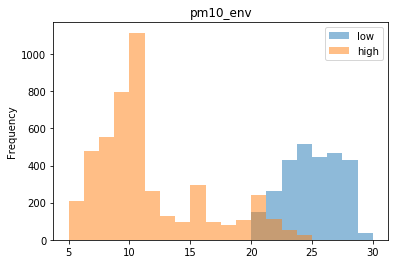

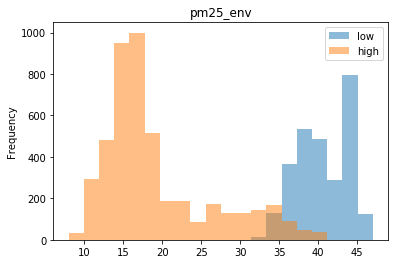

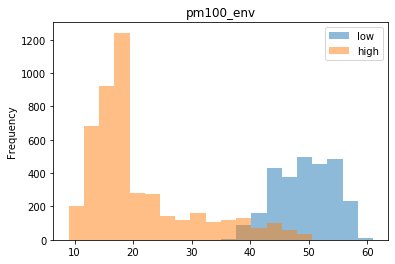

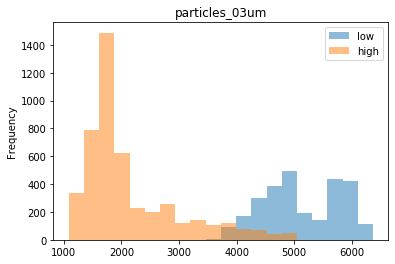

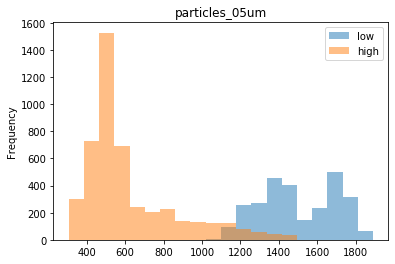

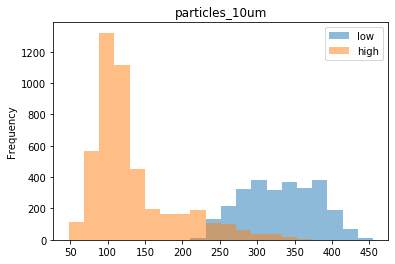

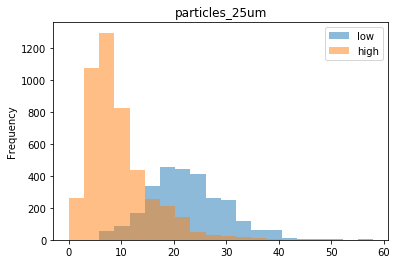

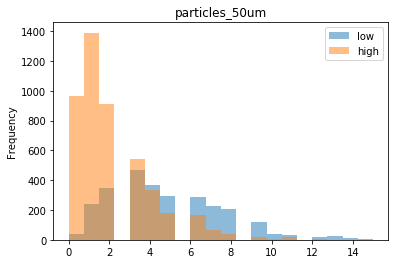

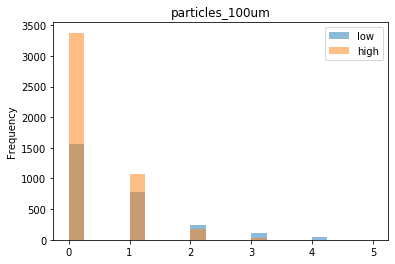

In [5]:
for n in names:
#     data[n].describe()
    data[n].plot.hist(alpha=0.5, bins=20, title=n)

In [6]:
# profile = ProfileReport(pm10_env, title='Pandas Profiling Report')#, html={'style':{'full_width':True}})

In [7]:
# profile.to_notebook_iframe()

In [8]:
for n in names:
    print(n)
    data[n].corr(method='pearson')

pm10_env


,low,high
low,1.00000,0.79359
high,0.79359,1.00000


pm25_env


,low,high
low,1.000000,0.778512
high,0.778512,1.000000


pm100_env


,low,high
low,1.000000,0.744445
high,0.744445,1.000000


particles_03um


,low,high
low,1.000000,0.807629
high,0.807629,1.000000


particles_05um


,low,high
low,1.000000,0.807281
high,0.807281,1.000000


particles_10um


,low,high
low,1.000000,0.703335
high,0.703335,1.000000


particles_25um


,low,high
low,1.000000,0.248531
high,0.248531,1.000000


particles_50um


,low,high
low,1.000000,0.149809
high,0.149809,1.000000


particles_100um


,low,high
low,1.000000,0.073742
high,0.073742,1.000000


In [9]:
from scipy.stats import ttest_ind
for n in names:
    print(n)
    ttest_ind(data[n]['low'], data[n]['high'], nan_policy='omit')

pm10_env


Ttest_indResult(statistic=149.98456326274834, pvalue=0.0)

pm25_env


Ttest_indResult(statistic=148.9255419264166, pvalue=0.0)

pm100_env


Ttest_indResult(statistic=155.54005070394732, pvalue=0.0)

particles_03um


Ttest_indResult(statistic=160.9294292131565, pvalue=0.0)

particles_05um


Ttest_indResult(statistic=161.54773595585476, pvalue=0.0)

particles_10um


Ttest_indResult(statistic=155.8910901021495, pvalue=0.0)

particles_25um


Ttest_indResult(statistic=86.30890000280013, pvalue=0.0)

particles_50um


Ttest_indResult(statistic=48.45352879418968, pvalue=0.0)

particles_100um


Ttest_indResult(statistic=18.560966173912465, pvalue=3.354499214688975e-75)

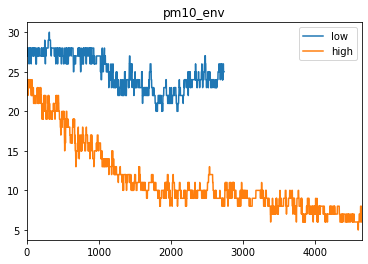

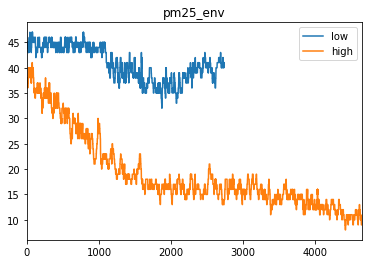

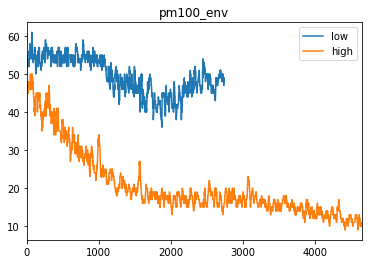

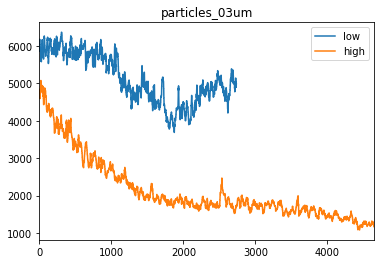

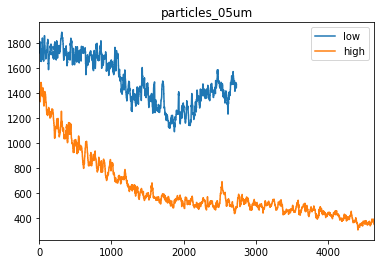

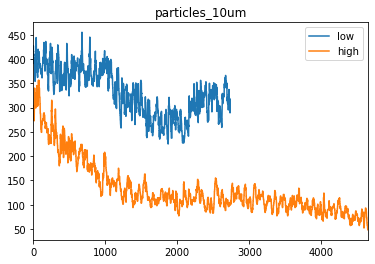

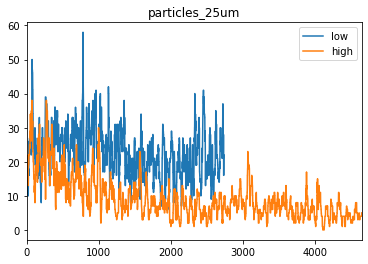

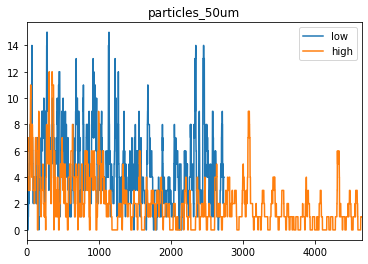

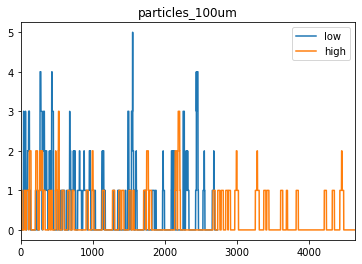

In [10]:
for n in names:
    data[n].plot(title=n)